<h2 style="font-size:30px; text-align: center;">Asia's 2023 Air Quality Analysis</h2>

This analysis explores city and country level air pollution trends across Asia in 2023, identifying the most and least polluted regions and cities.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [6]:
df=pd.read_csv(r"AirQuality Dataset.csv")
df

,Rank,City,Country,2023,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,Begusarai,India,118.9,31.2,235.3,156.8,113,109.3,99,63.8,61.8,71.5,61.8,210.5,285
1,2,Guwahati,India,105.4,220.2,168.1,129.2,112.2,69.5,51.3,46.6,60.2,76.7,76.4,126.9,128
2,3,Delhi,India,102.1,171.8,114.3,77.4,71,67.4,42.9,35.3,34.8,39.7,106.3,255.1,210
3,4,Mullanpur,India,100.4,106.3,123.7,78.1,56.6,53.4,53.9,63.2,59.7,59.6,110.4,253,201.4
4,5,Lahore,Pakistan,99.5,143.2,117.3,73.8,52.9,52.4,46.4,39.8,42.2,53.8,125.9,251,197.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,2160,Zhezqazghan,Kazakhstan,4.3,3.8,3.1,3.8,5.1,7.1,4,3.1,3,3,4.3,6.8,4.9
2160,2161,Mamuju,Indonesia,3.7,5.2,4.5,3.3,3.3,3.3,3.6,3.8,4.9,4.1,3.6,3.1,2.8
2161,2162,Kuyulusebil,Turkey,3.2,3.4,4,3.2,2.4,2.7,2.5,5.1,4.4,3.8,2.6,2.3,2.3
2162,2163,Shchuchinsk,Kazakhstan,3.0,0.9,0.8,1.4,1.4,1.8,2.1,2.3,2.6,2.4,3,8.2,11.3


In [7]:
print(df.dtypes)

Rank         int64
City        object
Country     object
2023       float64
Jan         object
Feb         object
Mar         object
Apr         object
May         object
Jun         object
Jul         object
Aug         object
Sep         object
Oct         object
Nov         object
Dec         object
dtype: object


In [8]:
for month in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']:
    df[month] = np.vectorize(lambda x: ''.join(c for c in str(x) if c.isdigit() or c in '.-'))(df[month])
    df[month] = pd.to_numeric(df[month], errors='coerce')

In [9]:
df = df.dropna()
df

,Rank,City,Country,2023,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,Begusarai,India,118.9,31.2,235.3,156.8,113.0,109.3,99.0,63.8,61.8,71.5,61.8,210.5,285.0
1,2,Guwahati,India,105.4,220.2,168.1,129.2,112.2,69.5,51.3,46.6,60.2,76.7,76.4,126.9,128.0
2,3,Delhi,India,102.1,171.8,114.3,77.4,71.0,67.4,42.9,35.3,34.8,39.7,106.3,255.1,210.0
3,4,Mullanpur,India,100.4,106.3,123.7,78.1,56.6,53.4,53.9,63.2,59.7,59.6,110.4,253.0,201.4
4,5,Lahore,Pakistan,99.5,143.2,117.3,73.8,52.9,52.4,46.4,39.8,42.2,53.8,125.9,251.0,197.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,2160,Zhezqazghan,Kazakhstan,4.3,3.8,3.1,3.8,5.1,7.1,4.0,3.1,3.0,3.0,4.3,6.8,4.9
2160,2161,Mamuju,Indonesia,3.7,5.2,4.5,3.3,3.3,3.3,3.6,3.8,4.9,4.1,3.6,3.1,2.8
2161,2162,Kuyulusebil,Turkey,3.2,3.4,4.0,3.2,2.4,2.7,2.5,5.1,4.4,3.8,2.6,2.3,2.3
2162,2163,Shchuchinsk,Kazakhstan,3.0,0.9,0.8,1.4,1.4,1.8,2.1,2.3,2.6,2.4,3.0,8.2,11.3


In [10]:
top_10 = df[['Country','City', '2023']].nlargest(10, '2023')
print(top_10)

    Country         City   2023
0     India    Begusarai  118.9
1     India     Guwahati  105.4
2     India        Delhi  102.1
3     India    Mullanpur  100.4
4  Pakistan       Lahore   99.5
5     India    New Delhi   92.7
6     India        Siwan   90.6
7     India      Saharsa   89.4
8     India  Goshaingaon   89.3
9     India      Katihar   88.8


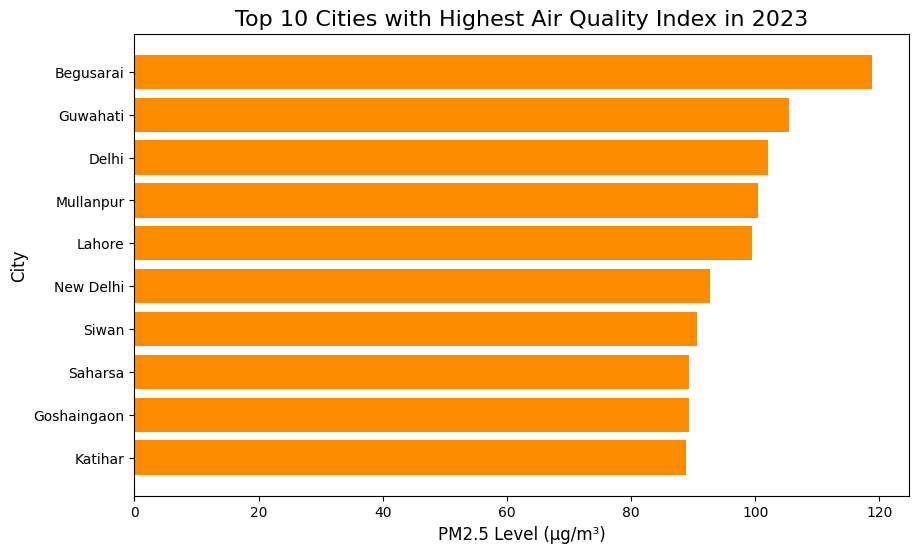

In [17]:
cities = top_10['City']
value_2023 = top_10['2023']

plt.figure(figsize=(10, 6))
plt.barh(cities, value_2023, color='#FF8C00')
plt.xlabel('PM2.5 Level (µg/m³)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top 10 Cities with Highest Air Quality Index in 2023', fontsize=16)
plt.gca().invert_yaxis() 
plt.show()

The most polluted cities in Asia during 2023 are predominantly concentrated in South Asia, with PM 2.5 levels far exceeding WHO safe limits. This highlights severe urban air quality challenges driven by population density, traffic emissions and regional climatic factors.

In [12]:
bottom_10 = df[['Country','City', '2023']].nsmallest(10, '2023')
print(bottom_10)

         Country         City  2023
2163  Kazakhstan          Chu   1.5
2162  Kazakhstan  Shchuchinsk   3.0
2161      Turkey  Kuyulusebil   3.2
2160   Indonesia       Mamuju   3.7
2158       Japan      Ibigawa   4.3
2159  Kazakhstan  Zhezqazghan   4.3
2157       Japan         Godo   4.4
2156   Indonesia       Kupang   4.6
2153       China        Ngari   5.5
2154       China     Nyingchi   5.5


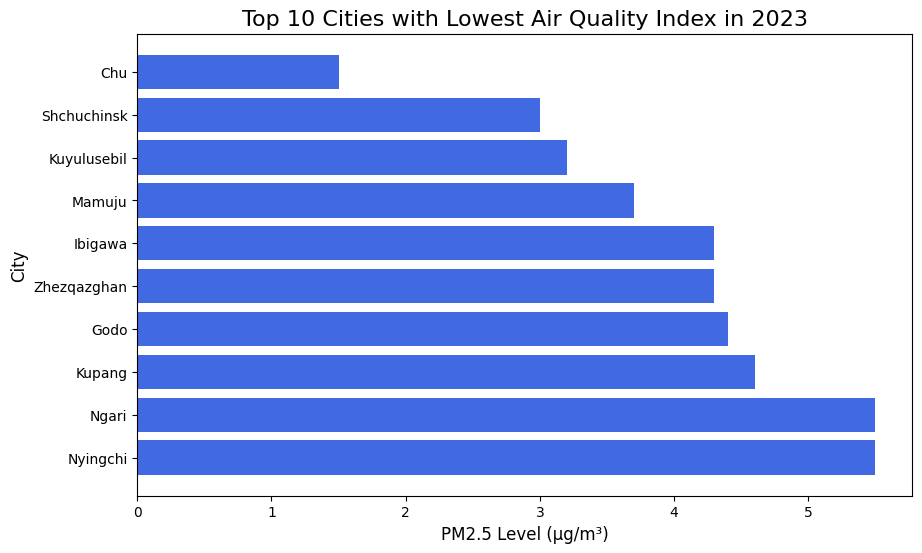

In [18]:
cities = bottom_10['City']
values_2023 = bottom_10['2023']

plt.figure(figsize=(10, 6))
plt.barh(cities, values_2023, color='#4169E1')
plt.xlabel('PM2.5 Level (µg/m³)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top 10 Cities with Lowest Air Quality Index in 2023', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

Cities with the lowest PM 2.5 levels are largely located in East and Southeast Asia, indicating comparatively cleaner air. Geographic advantages, lower industrial density and effective environmental controls may contribute to these outcomes.

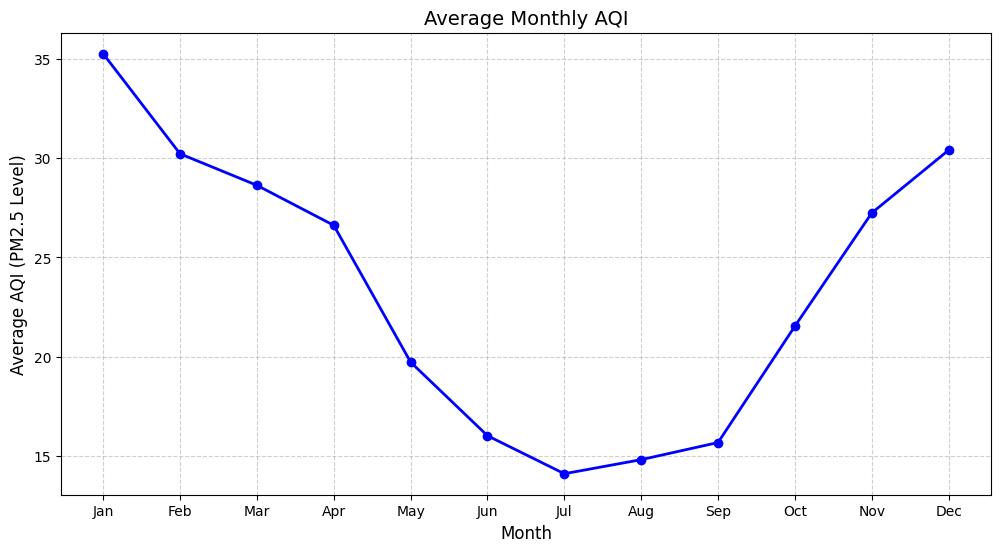

In [23]:
monthly_data = df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

avg_aqi = monthly_data.mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_aqi.index, avg_aqi.values, marker='o', linestyle='-', color='blue', linewidth=2)

plt.title('Average Monthly AQI', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average AQI (PM2.5 Level)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Air pollution levels show clear seasonality, with higher PM 2.5 concentrations during winter months and a noticeable decline during mid-year. This pattern is consistent with temperature inversion effects and reduced atmospheric dispersion in colder seasons.

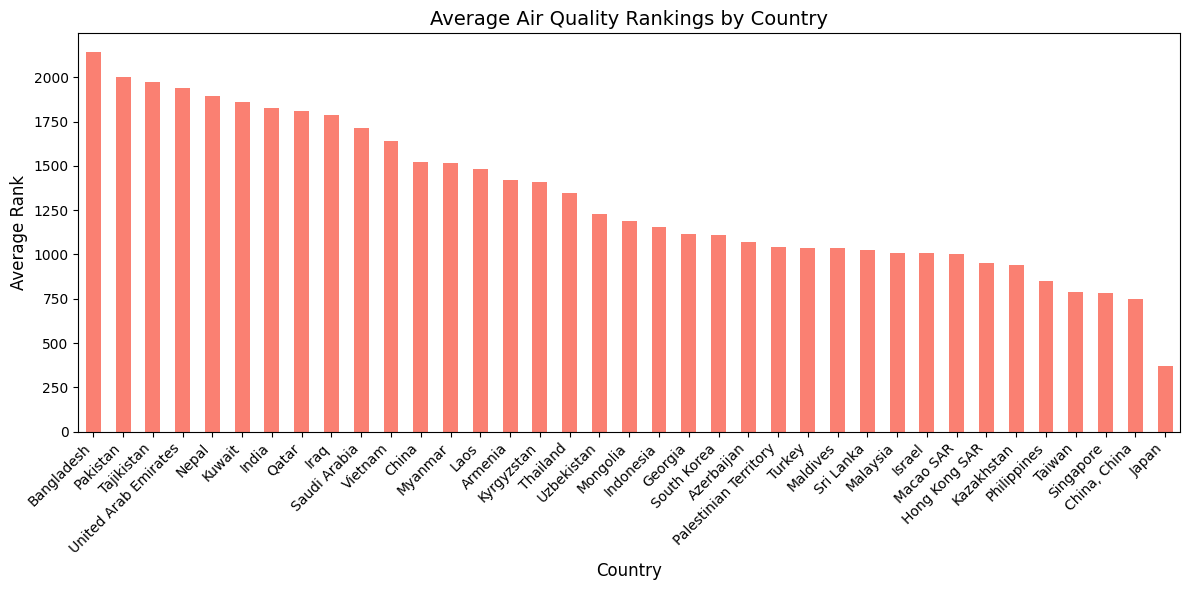

In [15]:
df = df.copy()
df['Pollution_Score'] = df['Rank'].max() - df['Rank'] + 1
avg_poll_country = df.groupby('Country')['Pollution_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_poll_country.plot(kind='bar', color='salmon')
plt.title('Average Air Quality Rankings by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Rank', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Countries in South Asia consistently rank among the most polluted on average, while East Asian and island nations tend to perform better. This contrast reflects differences in industrialization patterns, urban planning and environmental regulations.

In [16]:
map_df = df[["Country", "2023"]].groupby("Country").agg("mean").reset_index()

map = px.choropleth(
    data_frame=map_df,
    locationmode='country names',
    locations='Country',
    color='2023',
    projection='equirectangular',
    scope='asia',
    color_continuous_scale="Reds",
    height=600
)
map.update_layout(
    width=1200, height=500,
    title={'text': 'Average AQI (2023) by Countries', 'x': 0.5, 'xanchor': 'center'},
    title_font=dict(size=24, family="Arial", color="black")
)
map.show()

The choropleth map reveals regional pollution clusters, with South Asia emerging as a major hotspot. Country-level averages provide a high-level view, though they may mask extreme pollution levels in specific cities.